<a href="https://colab.research.google.com/github/Dila1998/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


importing boston huse price data set


In [7]:
house_price_dataframe = pd.read_csv('/content/Boston House Price Data.csv')

In [8]:
print (house_price_dataframe)

        CRIM    ZN  INDUS  CHAS    NOX     RM  ...  RAD    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31   0.0  0.538  6.575  ...  1.0  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  6.421  ...  2.0  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  7.185  ...  2.0  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  6.998  ...  3.0  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  7.147  ...  3.0  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...    ...  ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  6.593  ...  1.0  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  6.120  ...  1.0  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  6.976  ...  1.0  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  6.794  ...  1.0  273

In [9]:
#cheking number of rows and cols in data frame
house_price_dataframe.shape

(506, 14)

In [10]:
#check for missing values
house_price_dataframe.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [11]:
#statictical measures of dataset
house_price_dataframe.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


from matplotlib import pyplot as plt
_df_0['CRIM'].plot(kind='hist', bins=20, title='CRIM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ZN'].plot(kind='hist', bins=20, title='ZN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['INDUS'].plot(kind='hist', bins=20, title='INDUS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['CHAS'].plot(kind='hist', bins=20, title='CHAS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='CRIM', y='ZN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ZN', y='INDUS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='INDUS', y='CHAS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='CHAS', y='NOX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['CRIM'].plot(kind='line', figsize=(8, 4), title='CRIM')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['ZN'].plot(kind='line', figsize=(8, 4), title='ZN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['INDUS'].plot(kind='line', figsize=(8, 4), title='INDUS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['CHAS'].plot(kind='line', figsize=(8, 4), title='CHAS')
plt.gca().spines[['top', 'right']].set_visible(False)

understanding the corrilation

positive corrilation

negative corrilation

In [12]:
corrilation = house_price_dataframe.corr()

<Axes: >

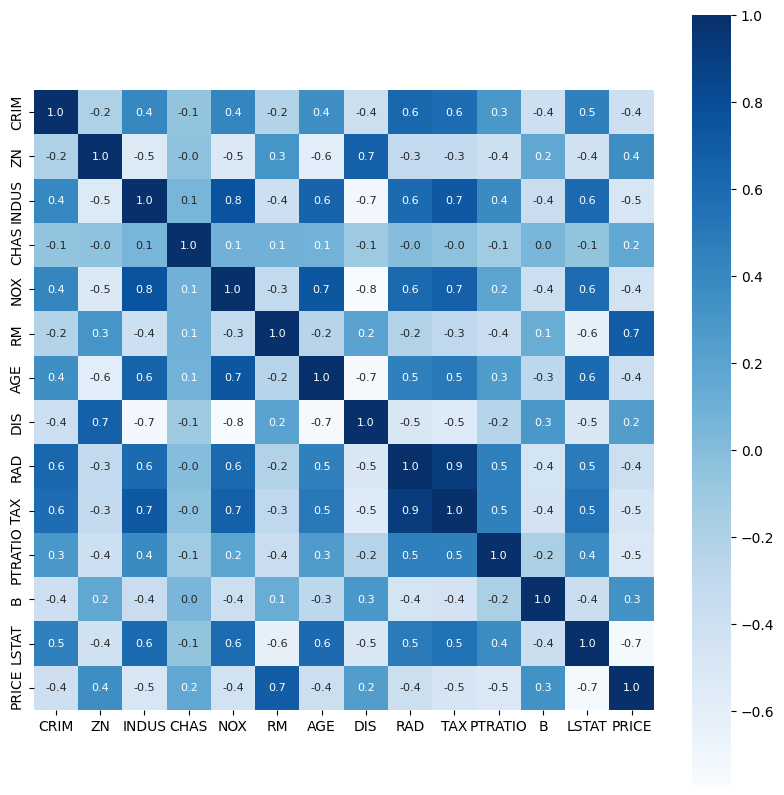

In [13]:
#constructing a heatmap to understand the corr
plt.figure(figsize = (10,10))
sns.heatmap(corrilation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [14]:
X = house_price_dataframe.drop(['PRICE'], axis=1)
Y = house_price_dataframe['PRICE']

In [15]:
print (X)
print (Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  

spliting data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print (X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


model training

XGBoost regrassor

In [18]:
#loading the model
model = XGBRegressor()

In [19]:
#training the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluation

perdictions

In [20]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [21]:
print (training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [22]:
#R squre error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#mean absalute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print ("R squared error : ", score_1)
print ("Mean absolute error : ", score_2)

R squared error :  0.9999980039471451
Mean absolute error :  0.0091330346494618


visialized predictions

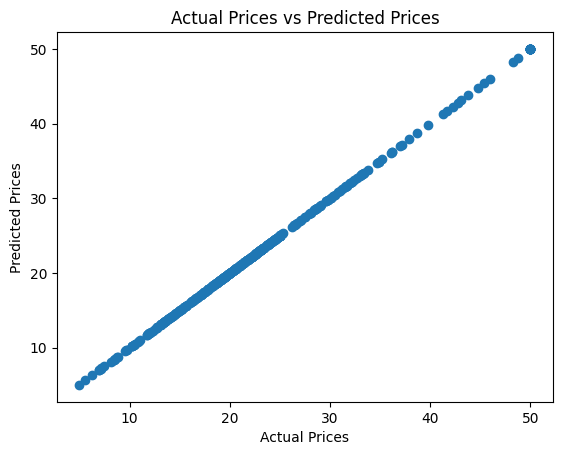

In [25]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [23]:
#accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [24]:
#R squre error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

#mean absalute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print ("R squared error : ", score_1)
print ("Mean absolute error : ", score_2)

R squared error :  0.9051721149855378
Mean absolute error :  2.0748727686264927


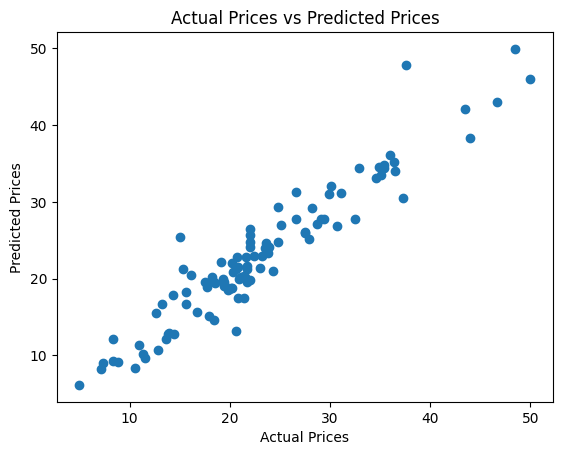

In [26]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()